# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

A review of the latitude versus temperature plot suggests that temperatures tend to rise the closer a city is to the equator. Cities located near -60 and 80 degrees latitude tended to have the lowest temperatures. However, the highest temperatures seemed to occur between the 20 to 40 degree latitude range. Factors that may need to be taken into account are the degree to which the individual cities are landlocked or how close each city is to a major body of water which may impact temperature. 

There does not appear to be a strong relationship between latitude and humidity from reviewing the data found in the Latitude versus Humidity chart. While lower humidity cities appeared the most in the 20 to 40 degree latitude range, most latitude ranges had cities with high levels of humidity. The Latitude versus Cloudiness chart also does not show a strong relationship between cloudiness and latitude.

The Latitude versus Wind Speed scatterplot shows that the higher wind speeds are more likely to occur in cities near the equator in the 20 to 40 degree latitude range. However, the varying degrees of wind speed appears to be evenly distributed across cities overall and the cities with wind speed in the 25 to 30 range appear to be outliers. 


In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['cape town',
 'punta arenas',
 'rikitea',
 'sentyabrskiy',
 'hermanus',
 'russell',
 'veraval',
 'mount gambier',
 'kirensk',
 'yellowknife',
 'bluff',
 'palmer',
 'dakar',
 'maneadero',
 'kirakira',
 'dikson',
 'lorengau',
 'carnarvon',
 'kuching',
 'chuy',
 'karamay',
 'albany',
 'camocim',
 'hope',
 'chokurdakh',
 'avarua',
 'meulaboh',
 'khatanga',
 'los llanos de aridane',
 'mocambique',
 'taolanaro',
 'opochka',
 'kiunga',
 'margate',
 'dipkarpaz',
 'tambul',
 'bredasdorp',
 'salvador',
 'lagoa',
 'chicama',
 'iqaluit',
 'damavand',
 'curup',
 'pucallpa',
 'encruzilhada do sul',
 'sayyan',
 'owase',
 'governador valadares',
 'kyzyl-suu',
 'jamestown',
 'atuona',
 'faya',
 'nikolskoye',
 'kodiak',
 'brae',
 'isangel',
 'castro',
 'pidhorodne',
 'umzimvubu',
 'altamira',
 'tocopilla',
 'hilo',
 'badvel',
 'mehamn',
 'porto novo',
 'shenjiamen',
 'bathsheba',
 'hobart',
 'ponta do sol',
 'hithadhoo',
 'santander',
 'salekhard',
 'victoria',
 'fuling',
 'vila velha',
 'busselton',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# Pick 5 major INTL cities
# get the temperature, lat, long into a dataframe

# 1 row for each city, and a column for temp, lat long

def city_data(city_name):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "appid": api_key,
        "q": city_name,
        "units":"imperial"
    }
    resp = requests.get(base_url, params=params).json()
    name = resp.get("name")
    temp = resp.get('main').get('temp')
    lat = resp.get("coord").get('lat')
    lng = resp.get("coord").get('lon')
    hum = resp.get("main").get('humidity')
    cld = resp.get("clouds").get('all')
    win = resp.get("wind").get('speed')
    
    return {
        "City" : name,
        "temp": temp,
        "lat": lat,
        "long": lng,
        "humidity": hum,
        "cloudiness": cld,
        "wind speed": win,
    }

city_info = []

for x in cities:
    try: 
        city_info.append(city_data(x))
        
    except:
        print(x)
        
city_list = pd.DataFrame.from_records(city_info).set_index('City')
city_list

sentyabrskiy
maneadero
karamay
mocambique
taolanaro
dipkarpaz
tambul
umzimvubu
illoqqortoormiut
samusu
saleaula
urumqi
vaitupu
camana
banmo
qui nhon
attawapiskat
belushya guba
itainopolis
bolungarvik
barentsburg
amderma
rungata
inveraray
betioky
grand river south east
lolua
pingzhuang
eldikan
yialos
tir pol
loubomo
tumannyy
tsihombe
mrirt
bengkulu
nizhneyansk
toliary
sukhumi
jiroft
asfi
marcona
chagda
gurupa
bengkalis
bardiyah
jujuy
kinanah
olafsvik
buqayq
mys shmidta
hihifo
yurya
dinsor
khonuu
yanchukan
aflu
sao francisco de assis
wulanhaote
east retford
ouranopolis


,cloudiness,humidity,lat,long,temp,wind speed
City,,,,,,
Cape Town,75,93,-33.93,18.42,51.01,9.17
Punta Arenas,75,93,-53.16,-70.91,35.28,9.17
Rikitea,64,86,-23.12,-134.97,74.61,13.65
Hermanus,0,88,-34.42,19.24,52.00,1.99
Russell,1,48,38.90,-98.86,83.07,8.05
Veraval,0,87,49.65,0.71,52.86,9.17
Mount Gambier,90,87,-37.83,140.78,53.60,13.87
Kirensk,100,39,57.78,108.12,76.77,10.94
Yellowknife,40,42,62.45,-114.38,68.00,6.93


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
import os
os.getcwd()
os.mkdir("output_data")

FileExistsError: [Errno 17] File exists: 'output_data'

In [24]:
city_list.to_csv(output_data_file, index=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

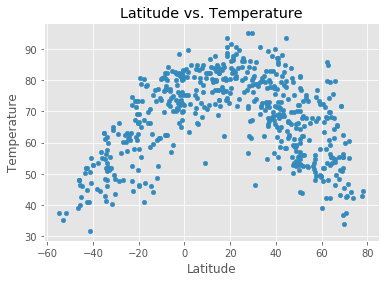

<Figure size 432x288 with 0 Axes>

In [42]:
city_list.plot(kind="scatter", x="lat", y="temp",title="Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()
plt.savefig('Lat_Temp.png')

#### Latitude vs. Humidity Plot

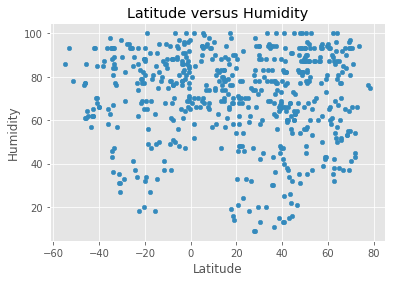

<Figure size 432x288 with 0 Axes>

In [43]:
city_list.plot(kind="scatter", x="lat", y="humidity",title="Latitude versus Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig('Lat_Humid.png')

#### Latitude vs. Cloudiness Plot

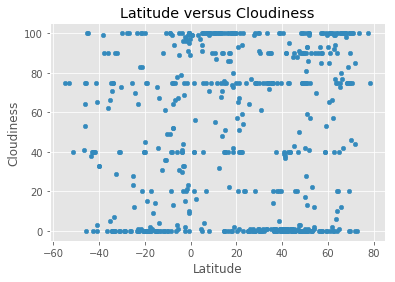

<Figure size 432x288 with 0 Axes>

In [44]:
city_list.plot(kind="scatter", x="lat", y="cloudiness",title="Latitude versus Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig('Lat_Cloud.png')

#### Latitude vs. Wind Speed Plot

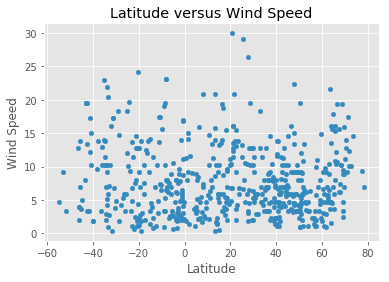

<Figure size 432x288 with 0 Axes>

In [45]:
city_list.plot(kind="scatter", x="lat", y="wind speed",title="Latitude versus Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig('Lat_Wind.png')